<a href="https://colab.research.google.com/github/roshisaxena/confidence_interval/blob/main/K_meansClustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Prepare a model for formation of clusters of
#customers based upon their income and spending power

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("Mall_Customers.csv")

In [ ]:
df.shape

(250, 5)

In [ ]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
x = df.iloc[:,[3,4]].values

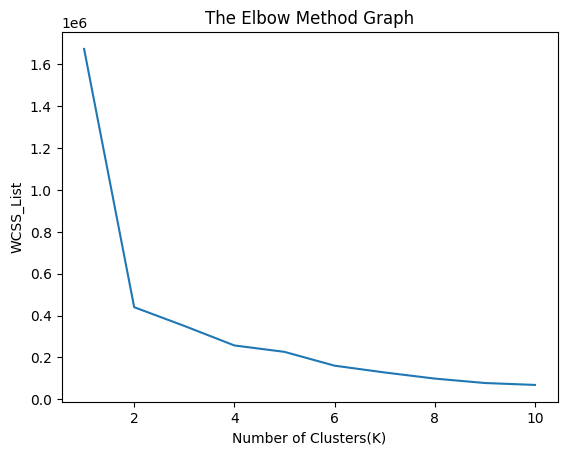

In [ ]:
# Finding optimal number of clusters using elbow method

from sklearn.cluster import KMeans
wcss_list = [] # Initializing the list for the value of WCSS

#Using for loop for iterations from 1 to 10

for i in range(1,11):
  kmeans = KMeans(n_clusters = i,init = 'k-means++',random_state = 42)
  kmeans.fit(x)
  wcss_list.append(kmeans.inertia_)

plt.plot(range(1,11),wcss_list)
plt.title("The Elbow Method Graph")
plt.xlabel("Number of Clusters(K)")
plt.ylabel("WCSS_List")
plt.show()

In [ ]:
# Training the K-Means model on a dataset

kmeans = KMeans(n_clusters=3, init = 'k-means++', random_state = 42)
y_predict = kmeans.fit_predict(x)

In [ ]:
y_predict

array([2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       0, 2, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2,
       0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

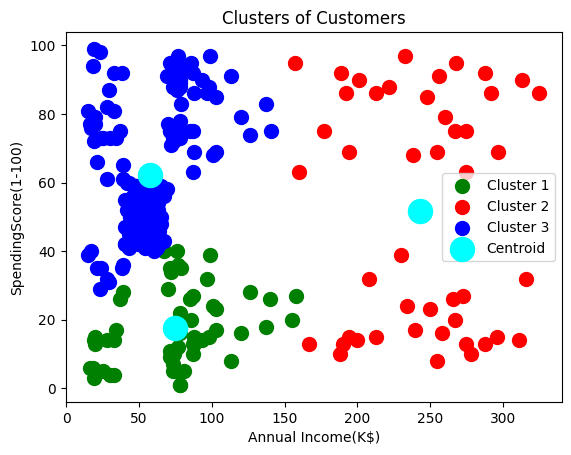

In [ ]:
## Visualizing the Clusters

# for cluster 1
plt.scatter(x[y_predict == 0,0],x[y_predict == 0,1], s =100, c = "Green",label = "Cluster 1")

# for cluster 2
plt.scatter(x[y_predict == 1,0], x[y_predict == 1,1], s = 100, c = "Red", label = "Cluster 2")

# for cluster 3
plt.scatter(x[y_predict == 2,0],x[y_predict == 2,1], s = 100, c = "Blue", label = "Cluster 3")

#for cluster 4
#plt.scatter(x[y_predict == 3,0], x[y_predict == 3,1], s = 100, c = "Yellow", label = "Cluster 4")

#for cluster 5
#plt.scatter(x[y_predict == 4,0], x[y_predict == 4,1], s = 100, c = "Pink", label = "Cluster 5")

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 300, c = 'Cyan',
            label = "Centroid")

plt.title("Clusters of Customers")
plt.xlabel("Annual Income(K$)")
plt.ylabel("SpendingScore(1-100)")
plt.legend()
plt.show()

In [ ]:
# Cluster 1 : Low Income Low Spending
# Cluster 2:  High Income High Spending
# Cluster 3:  Low Income High Spending
# Cluster 4:  Average Income Average Spending
# Cluster 5:  High Income low Spending